# Chest X-ray Images and Nueral Network Machine Learning

## imports and functions

In [238]:
import os, shutil
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from numpy import asarray
from keras import regularizers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.metrics import Recall

### Accuracy visual functions

In [75]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    

In [109]:
def visualize_training_results2(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

### Recall Visual Function

In [251]:
def recall_visual(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_recall_6'])
    plt.plot(history['recall_6'])
    plt.legend(['val_recall', 'recall'])
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.show()

In [257]:
def recall_visual2(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_recall_4'])
    plt.plot(history['recall_4'])
    plt.legend(['val_recall', 'recall'])
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.show()

##### viewing how many pixels they are in an image

In [3]:
image = Image.open('chest_xray/train/NORMAL/IM-0115-0001.jpeg')

In [4]:
pixels = asarray(image)

In [5]:
print(pixels.min(),pixels.max())

0 255


# Pulling Images, Reshaping, and saving them into variables

In [78]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory= 'chest_xray\\test' , 
        target_size=(64, 64),
        batch_size = 624)

Found 624 images belonging to 2 classes.


In [79]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory= 'chest_xray\\train' , 
        target_size=(64, 64), 
        batch_size = 1000)

Found 5086 images belonging to 2 classes.


In [87]:
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory= 'chest_xray\\val' , 
        target_size=(64, 64),
        batch_size = 148)

Found 148 images belonging to 3 classes.


In [88]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [89]:
train_images.shape[0]

1000

In [90]:
train_images.shape[1]

64

In [91]:
test_images.shape[0]

624

In [92]:
val_images.shape[0]

148

In [93]:
train_p = train_images.reshape(train_images.shape[0], -1)
test_p = test_images.reshape(test_images.shape[0], -1)
val_p = val_images.reshape(val_images.shape[0], -1)

print(train_p.shape)
print(test_p.shape)
print(val_p.shape)

(1000, 12288)
(624, 12288)
(148, 12288)


In [94]:
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

train_images shape: (1000, 64, 64, 3)
train_labels shape: (1000, 2)
test_images shape: (624, 64, 64, 3)
test_labels shape: (624, 2)
val_images shape: (148, 64, 64, 3)
val_labels shape: (148, 3)


In [96]:
train_y = np.reshape(train_labels[:,0], (1000,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (148,1))

# Basic model with one drop out layer

In [115]:
model = models.Sequential()

model.add(layers.Dense(32, activation='relu', input_shape = (12288,)))
model.add(layers.Dropout(0.2)) #drop out layer
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=['acc'])

summary = model.fit(train_p, train_y, epochs=25,
                    batch_size=148,
                    validation_data=(val_p, val_y))

Train on 1000 samples, validate on 148 samples
Epoch 1/25
1000/1000 [==============================] - 0s 438us/step - loss: 0.9244 - acc: 0.6990 - val_loss: 0.4193 - val_acc: 1.0000
Epoch 2/25
1000/1000 [==============================] - 0s 124us/step - loss: 0.5410 - acc: 0.7560 - val_loss: 0.1970 - val_acc: 1.0000
Epoch 3/25
1000/1000 [==============================] - 0s 119us/step - loss: 0.5616 - acc: 0.7560 - val_loss: 0.5044 - val_acc: 0.9865
Epoch 4/25
1000/1000 [==============================] - 0s 125us/step - loss: 0.5139 - acc: 0.7670 - val_loss: 0.1988 - val_acc: 1.0000
Epoch 5/25
1000/1000 [==============================] - 0s 139us/step - loss: 0.4774 - acc: 0.7580 - val_loss: 0.1376 - val_acc: 1.0000
Epoch 6/25
1000/1000 [==============================] - 0s 117us/step - loss: 0.4978 - acc: 0.7830 - val_loss: 0.4053 - val_acc: 0.9257
Epoch 7/25
1000/1000 [==============================] - 0s 118us/step - loss: 0.4684 - acc: 0.7820 - val_loss: 0.4085 - val_acc: 1.0000
E

In [240]:
results_train1 = model.evaluate(train_p, train_y)
results_test1 = model.evaluate(test_p, test_y)

print(results_train1)
print(results_test1)

624/624 [==============================] - 0s 233us/step
[0.07983981817960739, 0.9729999899864197]
[1.2052653630574544, 0.7179487347602844]


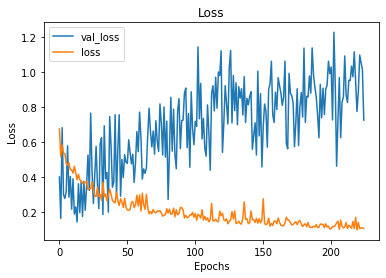

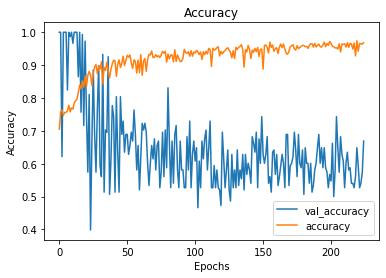

In [241]:
visualize_training_results2(summary)

# Basic Model with one Regularization

In [126]:
model_br = models.Sequential()

model_br.add(layers.Dense(32, activation='relu', input_shape = (12288,)))
model_br.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization layer
model_br.add(layers.Dense(1, activation='sigmoid'))

model_br.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=['acc'])

summary7 = model_br.fit(train_p, train_y, epochs=25,
                    batch_size=148,
                    validation_data=(val_p, val_y))

Train on 1000 samples, validate on 148 samples
Epoch 1/25
1000/1000 [==============================] - 0s 398us/step - loss: 0.9045 - acc: 0.6840 - val_loss: 0.6802 - val_acc: 1.0000
Epoch 2/25
1000/1000 [==============================] - 0s 122us/step - loss: 0.8606 - acc: 0.7560 - val_loss: 0.6833 - val_acc: 1.0000
Epoch 3/25
1000/1000 [==============================] - 0s 118us/step - loss: 0.8438 - acc: 0.7560 - val_loss: 0.5971 - val_acc: 1.0000
Epoch 4/25
1000/1000 [==============================] - 0s 120us/step - loss: 0.8454 - acc: 0.7560 - val_loss: 0.6125 - val_acc: 1.0000
Epoch 5/25
1000/1000 [==============================] - 0s 120us/step - loss: 0.8166 - acc: 0.7560 - val_loss: 0.4978 - val_acc: 1.0000
Epoch 6/25
1000/1000 [==============================] - 0s 118us/step - loss: 0.7904 - acc: 0.7560 - val_loss: 0.9278 - val_acc: 0.6351
Epoch 7/25
1000/1000 [==============================] - 0s 120us/step - loss: 0.8143 - acc: 0.7840 - val_loss: 0.5036 - val_acc: 1.0000
E

In [124]:
results_train6 = model_br.evaluate(train_p, train_y)
results_test6 = model_br.evaluate(test_p, test_y)
print(results_train6)
print(results_test6)

624/624 [==============================] - 0s 86us/step
[0.9328650970458985, 0.6650000214576721]
[0.8603853277671032, 0.7291666865348816]


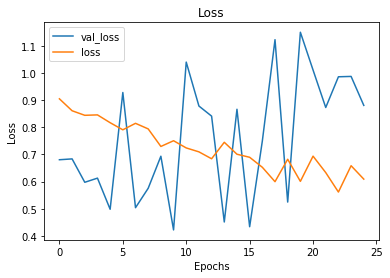

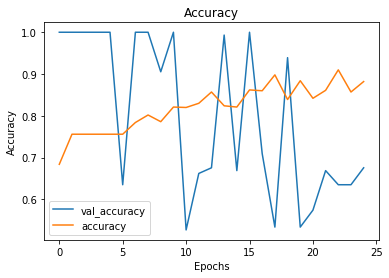

In [127]:
visualize_training_results2(summary7)

# Basic Model with Early Stopping

In [129]:
model_bes = models.Sequential()

model_bes.add(layers.Dense(32, activation='relu', input_shape = (12288,)))
model_bes.add(layers.Dense(1, activation='sigmoid'))

model_bes.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=['acc'])

#adding early stopping to my already made model
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')
callbacks_list = [early_stop]

summary8 = model_bes.fit(train_p, train_y, epochs=40, batch_size=148,
                    validation_data=(val_p, val_y),
                    callbacks=callbacks_list)


Train on 1000 samples, validate on 148 samples
Epoch 1/40
1000/1000 [==============================] - 0s 337us/step - loss: 0.7158 - acc: 0.6900 - val_loss: 0.3550 - val_acc: 1.0000
Epoch 2/40
1000/1000 [==============================] - 0s 119us/step - loss: 0.5375 - acc: 0.7560 - val_loss: 0.3967 - val_acc: 1.0000
Epoch 00002: early stopping


In [131]:
results_train8 = model_bes.evaluate(train_p, train_y)
results_test8 = model_bes.evaluate(test_p, test_y)
print(results_train8)
print(results_test8)

624/624 [==============================] - 0s 86us/step
[0.51684987783432, 0.7559999823570251]
[0.6203293127891345, 0.625]


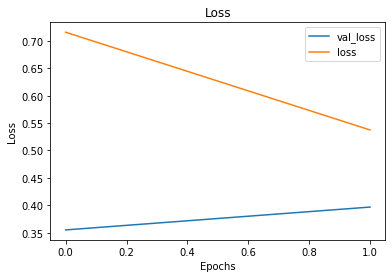

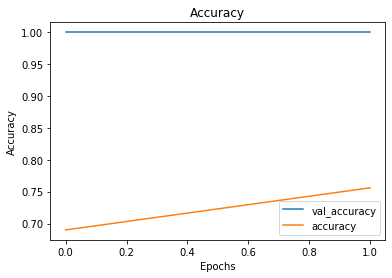

In [132]:
visualize_training_results2(summary8)

# Model with a combination of layers

In [145]:
model_col = models.Sequential()

model_col.add(layers.Dense(32, activation='relu', input_shape = (12288,)))
model_col.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization layer
model_col.add(layers.Dropout(0.2)) #drop out layer
model_col.add(layers.Dense(1, activation='sigmoid'))

model_col.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=['acc'])

early_stop1 = EarlyStopping(monitor='val_acc', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')
callbacks_list1 = [early_stop]

#adding early stopping to my already made model
summary9 = model_col.fit(train_p, train_y, epochs=30, batch_size=148,
                    validation_data=(val_p, val_y))

Train on 1000 samples, validate on 148 samples
Epoch 1/30
1000/1000 [==============================] - 1s 555us/step - loss: 0.8886 - acc: 0.7460 - val_loss: 0.5428 - val_acc: 1.0000
Epoch 2/30
1000/1000 [==============================] - 0s 141us/step - loss: 0.8547 - acc: 0.7570 - val_loss: 0.7529 - val_acc: 1.0000
Epoch 3/30
1000/1000 [==============================] - 0s 151us/step - loss: 0.8456 - acc: 0.7680 - val_loss: 0.6397 - val_acc: 1.0000
Epoch 4/30
1000/1000 [==============================] - 0s 150us/step - loss: 0.7938 - acc: 0.7710 - val_loss: 0.5680 - val_acc: 1.0000
Epoch 5/30
1000/1000 [==============================] - 0s 152us/step - loss: 0.7933 - acc: 0.7960 - val_loss: 0.5356 - val_acc: 1.0000
Epoch 6/30
1000/1000 [==============================] - 0s 148us/step - loss: 0.8223 - acc: 0.7650 - val_loss: 0.6646 - val_acc: 0.9730
Epoch 7/30
1000/1000 [==============================] - 0s 157us/step - loss: 0.7571 - acc: 0.7990 - val_loss: 0.7586 - val_acc: 0.7568
E

In [146]:
results_train9 = model_col.evaluate(train_p, train_y)
results_test9 = model_col.evaluate(test_p, test_y)
print(results_train9)
print(results_test9)

624/624 [==============================] - 0s 134us/step
[0.6146294379234314, 0.8659999966621399]
[0.663265925187331, 0.8413461446762085]


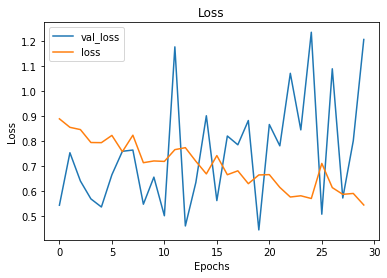

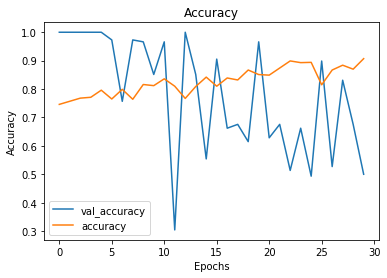

In [147]:
visualize_training_results2(summary9)

##### The visuals above shows how our model is still not finished learning from the training data. Run more epochs

# Same drop out model but ran for longer epoch

In [160]:
model = models.Sequential()

model.add(layers.Dense(32, activation='relu', input_shape = (12288,)))
model.add(layers.Dropout(0.2)) #drop out layer
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=['acc'])

summary = model.fit(train_p, train_y, epochs=150,
                    batch_size=148,
                    validation_data=(val_p, val_y))

Train on 1000 samples, validate on 148 samples
Epoch 1/225
1000/1000 [==============================] - 0s 441us/step - loss: 0.6741 - acc: 0.7050 - val_loss: 0.3987 - val_acc: 1.0000
Epoch 2/225
1000/1000 [==============================] - 0s 120us/step - loss: 0.5143 - acc: 0.7570 - val_loss: 0.1609 - val_acc: 1.0000
Epoch 3/225
1000/1000 [==============================] - 0s 120us/step - loss: 0.5815 - acc: 0.7640 - val_loss: 0.6811 - val_acc: 0.6216
Epoch 4/225
1000/1000 [==============================] - 0s 121us/step - loss: 0.5329 - acc: 0.7470 - val_loss: 0.2980 - val_acc: 1.0000
Epoch 5/225
1000/1000 [==============================] - 0s 125us/step - loss: 0.5331 - acc: 0.7560 - val_loss: 0.2757 - val_acc: 1.0000
Epoch 6/225
1000/1000 [==============================] - 0s 116us/step - loss: 0.4750 - acc: 0.7560 - val_loss: 0.3127 - val_acc: 1.0000
Epoch 7/225
1000/1000 [==============================] - 0s 124us/step - loss: 0.4672 - acc: 0.7610 - val_loss: 0.5773 - val_acc: 0

In [161]:
results_train1 = model.evaluate(train_p, train_y)
results_test1 = model.evaluate(test_p, test_y)

print(results_train1)
print(results_test1)

624/624 [==============================] - 0s 99us/step
[0.11981177562475205, 0.9480000138282776]
[1.3388227774546697, 0.6987179517745972]


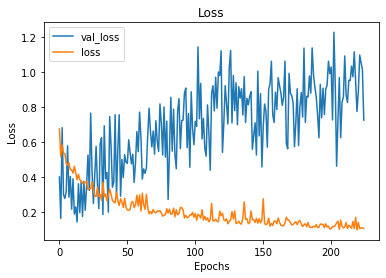

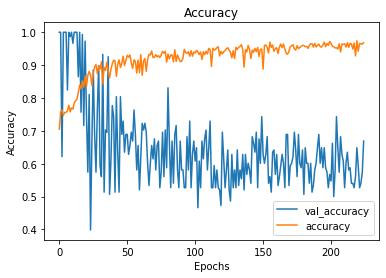

In [162]:
visualize_training_results2(summary)

##### The graph is showing our model plateauing with the accuracy around .6. 

# More epochs for Regularization model

In [172]:
model_br = models.Sequential()

model_br.add(layers.Dense(32, activation='relu', input_shape = (12288,)))
model_br.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization layer
model_br.add(layers.Dense(1, activation='sigmoid'))

model_br.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=['acc'])

summary7 = model_br.fit(train_p, train_y, epochs=250,
                    batch_size=148,
                    validation_data=(val_p, val_y))

Train on 1000 samples, validate on 148 samples
Epoch 1/250
1000/1000 [==============================] - 0s 398us/step - loss: 0.8904 - acc: 0.7260 - val_loss: 0.5200 - val_acc: 1.0000
Epoch 2/250
1000/1000 [==============================] - 0s 116us/step - loss: 0.8370 - acc: 0.7560 - val_loss: 0.5833 - val_acc: 1.0000
Epoch 3/250
1000/1000 [==============================] - 0s 114us/step - loss: 0.8147 - acc: 0.7600 - val_loss: 0.6578 - val_acc: 1.0000
Epoch 4/250
1000/1000 [==============================] - 0s 116us/step - loss: 0.8377 - acc: 0.7610 - val_loss: 0.5645 - val_acc: 1.0000
Epoch 5/250
1000/1000 [==============================] - 0s 124us/step - loss: 0.8067 - acc: 0.7560 - val_loss: 0.6639 - val_acc: 1.0000
Epoch 6/250
1000/1000 [==============================] - 0s 116us/step - loss: 0.7587 - acc: 0.7610 - val_loss: 0.4660 - val_acc: 1.0000
Epoch 7/250
1000/1000 [==============================] - 0s 118us/step - loss: 0.7830 - acc: 0.8000 - val_loss: 0.8925 - val_acc: 0

In [173]:
results_train6 = model_br.evaluate(train_p, train_y)
results_test6 = model_br.evaluate(test_p, test_y)
print(results_train6)
print(results_test6)

624/624 [==============================] - 0s 97us/step
[0.22708552718162536, 0.9779999852180481]
[1.1544539133707683, 0.7211538553237915]


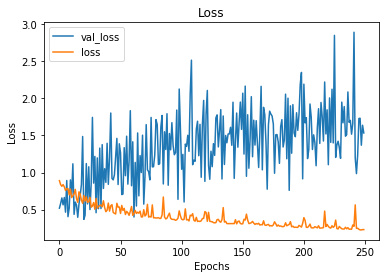

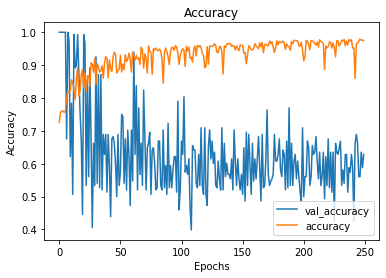

In [174]:
visualize_training_results2(summary7)

##### Model with more epochs is showing to hover around .6 as well

# Model with Hidden Layer

In [179]:
model_h = models.Sequential()

model_h.add(layers.Dense(32, activation='relu', input_shape = (12288,)))
model_h.add(layers.Dense(32, activation='relu'))
model_h.add(layers.Dense(32, activation='relu'))
model_h.add(layers.Dense(1, activation='sigmoid'))

model_h.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=['acc'])

sum2 = model_h.fit(train_p, train_y, epochs=175,
                    batch_size=148,
                    validation_data=(val_p, val_y))

Train on 1000 samples, validate on 148 samples
Epoch 1/175
1000/1000 [==============================] - 0s 426us/step - loss: 0.6154 - acc: 0.6940 - val_loss: 0.3316 - val_acc: 1.0000
Epoch 2/175
1000/1000 [==============================] - 0s 117us/step - loss: 0.5436 - acc: 0.7560 - val_loss: 0.3408 - val_acc: 1.0000
Epoch 3/175
1000/1000 [==============================] - 0s 116us/step - loss: 0.5322 - acc: 0.7560 - val_loss: 0.3160 - val_acc: 1.0000
Epoch 4/175
1000/1000 [==============================] - 0s 109us/step - loss: 0.5179 - acc: 0.7560 - val_loss: 0.3162 - val_acc: 1.0000
Epoch 5/175
1000/1000 [==============================] - 0s 113us/step - loss: 0.5010 - acc: 0.7560 - val_loss: 0.3011 - val_acc: 1.0000
Epoch 6/175
1000/1000 [==============================] - 0s 116us/step - loss: 0.4849 - acc: 0.7560 - val_loss: 0.3854 - val_acc: 1.0000
Epoch 7/175
1000/1000 [==============================] - 0s 113us/step - loss: 0.4720 - acc: 0.7560 - val_loss: 0.3430 - val_acc: 1

In [180]:
results_train9 = model_h.evaluate(train_p, train_y)
results_test9 = model_h.evaluate(test_p, test_y)
print(results_train9)
print(results_test9)

624/624 [==============================] - 0s 107us/step
[0.13945304507017137, 0.9399999976158142]
[1.1026042302449544, 0.692307710647583]


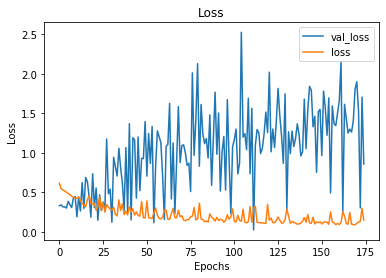

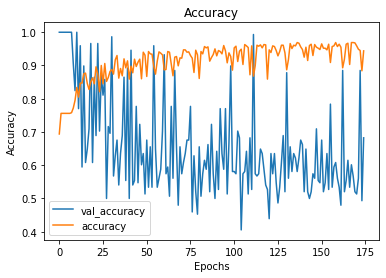

In [181]:
visualize_training_results2(sum2)

##### With two hidden layer it also gives and accuracy a little under .6

# Combinations of layers and longer epcochs

In [217]:
model_col = models.Sequential()

model_col.add(layers.Dense(32, activation='relu', input_shape = (12288,)))
model_col.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization layer
model_col.add(layers.Dropout(0.2)) #drop out layer
model_col.add(layers.Dropout(0.2)) #drop out layer
model_col.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization layer
model_col.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization layer
model_col.add(layers.Dropout(0.2)) #drop out layer
model_col.add(layers.Dense(64, activation='relu'))
model_col.add(layers.Dense(32, activation='relu'))

model_col.add(layers.Dense(1, activation='sigmoid'))

model_col.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=['acc'])

summary9 = model_col.fit(train_p, train_y, epochs=200, batch_size=148,
                    validation_data=(val_p, val_y))

Train on 1000 samples, validate on 148 samples
Epoch 1/200
1000/1000 [==============================] - 1s 831us/step - loss: 1.2654 - acc: 0.7370 - val_loss: 1.0112 - val_acc: 1.0000
Epoch 2/200
1000/1000 [==============================] - 0s 121us/step - loss: 1.2309 - acc: 0.7530 - val_loss: 1.0363 - val_acc: 1.0000
Epoch 3/200
1000/1000 [==============================] - 0s 126us/step - loss: 1.2225 - acc: 0.7480 - val_loss: 1.0050 - val_acc: 1.0000
Epoch 4/200
1000/1000 [==============================] - 0s 123us/step - loss: 1.2164 - acc: 0.7480 - val_loss: 1.0311 - val_acc: 1.0000
Epoch 5/200
1000/1000 [==============================] - 0s 128us/step - loss: 1.2096 - acc: 0.7540 - val_loss: 1.0069 - val_acc: 1.0000
Epoch 6/200
1000/1000 [==============================] - 0s 124us/step - loss: 1.1850 - acc: 0.7540 - val_loss: 0.9959 - val_acc: 1.0000
Epoch 7/200
1000/1000 [==============================] - 0s 117us/step - loss: 1.1746 - acc: 0.7540 - val_loss: 0.9460 - val_acc: 1

In [218]:
results_train9 = model_col.evaluate(train_p, train_y)
results_test9 = model_col.evaluate(test_p, test_y)
print(results_train9)
print(results_test9)

624/624 [==============================] - 0s 101us/step
[0.5761502256393433, 0.9269999861717224]
[1.848886551001133, 0.6939102411270142]


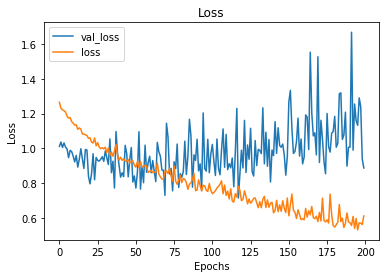

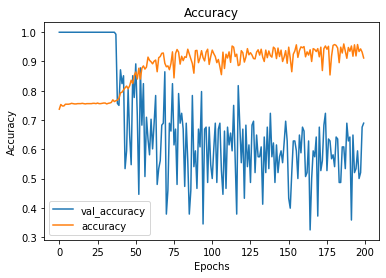

In [219]:
visualize_training_results2(summary9)

# Basic CNN Model

In [104]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(32, (4, 4), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [189]:
summary1 = cnn_model.fit(train_images, train_y, epochs=30, batch_size=148, validation_data=(val_images, val_y))

Train on 1000 samples, validate on 148 samples
Epoch 1/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1955 - acc: 0.9250 - val_loss: 0.8056 - val_acc: 0.6351
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1897 - acc: 0.9250 - val_loss: 0.9859 - val_acc: 0.5878
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1773 - acc: 0.9280 - val_loss: 0.7890 - val_acc: 0.6351
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1763 - acc: 0.9340 - val_loss: 1.0220 - val_acc: 0.5878
Epoch 5/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1814 - acc: 0.9300 - val_loss: 0.9786 - val_acc: 0.6014
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1757 - acc: 0.9260 - val_loss: 0.5987 - val_acc: 0.7297
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2075 - acc: 0.9120 - val_loss: 0.8950 - val_acc: 0.6216
Epoch 8/30
1000

In [213]:
results_train = cnn_model.evaluate(train_images, train_y)
results_test = cnn_model.evaluate(test_images, test_y)

print(results_train)
print(results_test)

624/624 [==============================] - 0s 663us/step
[0.15461599707603454, 0.9390000104904175]
[0.6648171505866907, 0.75]


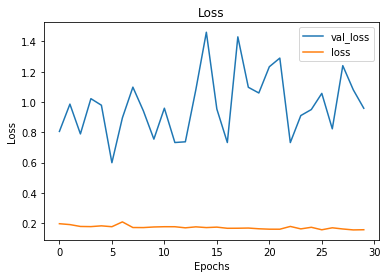

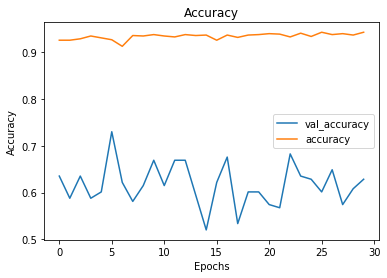

In [214]:
visualize_training_results2(summary1)

The visual above shows how well the model predicts new data compared to the training data.

# CNN Model with drop out layer

#### Adding two layers of drop out layers to see if it will help improve my accuracy

In [192]:
cnn_model_drop = models.Sequential()
cnn_model_drop.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
cnn_model_drop.add(layers.MaxPooling2D((2, 2)))

cnn_model_drop.add(layers.Conv2D(32, (4, 4), activation='relu'))
cnn_model_drop.add(layers.MaxPooling2D((2, 2)))

cnn_model_drop.add(layers.Dropout(0.2)) #drop out layers added here
cnn_model_drop.add(layers.Dropout(0.2))

cnn_model_drop.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model_drop.add(layers.MaxPooling2D((2, 2)))

cnn_model_drop.add(layers.Flatten())
cnn_model_drop.add(layers.Dense(64, activation='relu'))
cnn_model_drop.add(layers.Dense(1, activation='sigmoid'))

cnn_model_drop.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

summary2 = cnn_model_drop.fit(train_images, train_y, epochs=30, batch_size=148, validation_data=(val_images, val_y))

Train on 1000 samples, validate on 148 samples
Epoch 1/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6804 - acc: 0.5720 - val_loss: 0.5794 - val_acc: 1.0000
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5944 - acc: 0.7560 - val_loss: 0.4818 - val_acc: 1.0000
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5680 - acc: 0.7560 - val_loss: 0.4288 - val_acc: 1.0000
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5599 - acc: 0.7560 - val_loss: 0.4025 - val_acc: 1.0000
Epoch 5/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5585 - acc: 0.7560 - val_loss: 0.3881 - val_acc: 1.0000
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5570 - acc: 0.7560 - val_loss: 0.3991 - val_acc: 1.0000
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5552 - acc: 0.7560 - val_loss: 0.3856 - val_acc: 1.0000
Epoch 8/30
1000

In [211]:
results_train = cnn_model_drop.evaluate(train_images, train_y)
results_test = cnn_model_drop.evaluate(test_images, test_y)

print(results_train)
print(results_test)

624/624 [==============================] - 0s 777us/step
[0.5124086215496063, 0.7559999823570251]
[0.6156593622305454, 0.625]


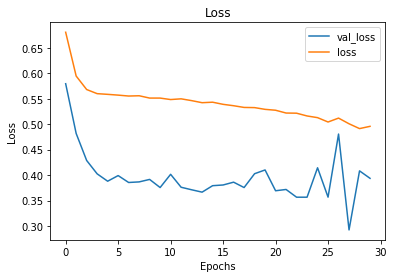

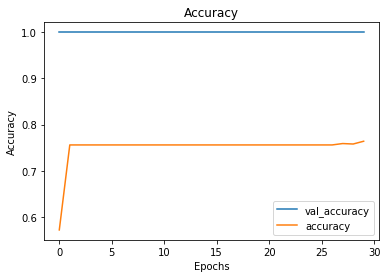

In [212]:
visualize_training_results2(summary2)

# CNN with regularzation

In [33]:
cnn_model_reg = models.Sequential()
cnn_model_reg.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
cnn_model_reg.add(layers.MaxPooling2D((2, 2)))

cnn_model_reg.add(layers.Conv2D(32, (4, 4), activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization added here
cnn_model_reg.add(layers.MaxPooling2D((2, 2)))

cnn_model_reg.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model_reg.add(layers.MaxPooling2D((2, 2)))

cnn_model_reg.add(layers.Flatten())
cnn_model_reg.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # Regularization added here
cnn_model_reg.add(layers.Dense(1, activation='sigmoid'))

cnn_model_reg.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [195]:
summary3 = cnn_model_reg.fit(train_images, train_y, epochs=30, batch_size=148, validation_data=(val_images, val_y))

Train on 1000 samples, validate on 148 samples
Epoch 1/30
1000/1000 [==============================] - 2s 2ms/step - loss: 2.1077 - acc: 0.7560 - val_loss: 1.8303 - val_acc: 1.0000
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 2.1005 - acc: 0.7560 - val_loss: 1.8132 - val_acc: 1.0000
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0936 - acc: 0.7560 - val_loss: 1.8186 - val_acc: 1.0000
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0868 - acc: 0.7560 - val_loss: 1.8310 - val_acc: 1.0000
Epoch 5/30
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0816 - acc: 0.7560 - val_loss: 1.7992 - val_acc: 1.0000
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0754 - acc: 0.7560 - val_loss: 1.8012 - val_acc: 1.0000
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0686 - acc: 0.7560 - val_loss: 1.7958 - val_acc: 1.0000
Epoch 8/30
1000

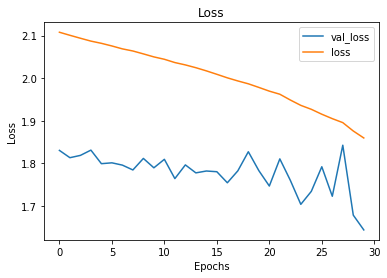

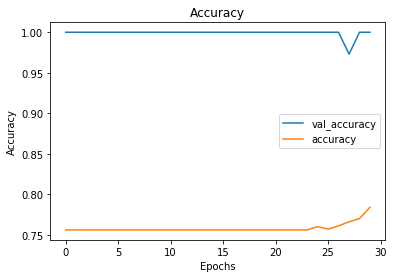

In [196]:
visualize_training_results2(summary3)

##### this model is showing how it is over fit

In [197]:
results_train = cnn_model_reg.evaluate(train_images, train_y)
results_test = cnn_model_reg.evaluate(test_images, test_y)

print(results_train)
print(results_test)

624/624 [==============================] - 0s 652us/step
[1.8673489847183227, 0.7580000162124634]
[2.0551059123797293, 0.625]


# CNN Model with Early Stopping

In [198]:
cnn_model_es = models.Sequential()
cnn_model_es.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
cnn_model_es.add(layers.MaxPooling2D((2, 2)))

cnn_model_es.add(layers.Conv2D(32, (4, 4), activation='relu'))
cnn_model_es.add(layers.MaxPooling2D((2, 2)))

cnn_model_es.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model_es.add(layers.MaxPooling2D((2, 2)))

cnn_model_es.add(layers.Flatten())
cnn_model_es.add(layers.Dense(64, activation='relu'))
cnn_model_es.add(layers.Dense(1, activation='sigmoid'))

#adding early stopping to my already made model
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')
callbacks_list = [early_stop]

cnn_model_es.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

summary4 = cnn_model_es.fit(train_images, train_y, epochs=20, batch_size=148, validation_data=(val_images, val_y), callbacks=callbacks_list)

Train on 1000 samples, validate on 148 samples
Epoch 1/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6323 - acc: 0.7560 - val_loss: 0.4750 - val_acc: 1.0000
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5900 - acc: 0.7560 - val_loss: 0.3648 - val_acc: 1.0000
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5711 - acc: 0.7560 - val_loss: 0.3207 - val_acc: 1.0000
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5657 - acc: 0.7560 - val_loss: 0.2956 - val_acc: 1.0000
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5635 - acc: 0.7560 - val_loss: 0.2978 - val_acc: 1.0000
Epoch 00005: early stopping


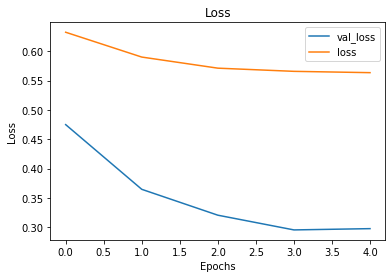

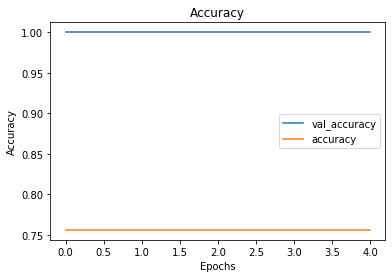

In [199]:
visualize_training_results2(summary4)

##### Need to run the model for more epochs since it is still learning from the data.

In [200]:
results_train = cnn_model_es.evaluate(train_images, train_y)
results_test = cnn_model_es.evaluate(test_images, test_y)

print(results_train)
print(results_test)

624/624 [==============================] - 0s 671us/step
[0.5626216824054718, 0.7559999823570251]
[0.7007568768965893, 0.625]


# Trying a combination of layers

#### Adding many layers of drop out and regularization to lower over fitting of cnn model. Running model for longer amount of epochs to let the model learn

In [233]:
cnn_model_combo = models.Sequential()
cnn_model_combo.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
cnn_model_combo.add(layers.MaxPooling2D((2, 2)))

cnn_model_combo.add(layers.Conv2D(32, (4, 4), activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization added here
cnn_model_combo.add(layers.MaxPooling2D((2, 2)))

cnn_model_combo.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # Regularization added here
cnn_model_combo.add(layers.Dropout(0.2)) #drop out layers added here
cnn_model_combo.add(layers.Dropout(0.2)) #drop out layer
cnn_model_combo.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization layer
cnn_model_combo.add(layers.Dropout(0.2)) #drop out layer
cnn_model_combo.add(layers.Dropout(0.2)) #drop out layer
cnn_model_combo.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization layer
cnn_model_combo.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization layer
cnn_model_combo.add(layers.Dropout(0.2)) #drop out layer
cnn_model_combo.add(layers.Dropout(0.2)) #drop out layer


cnn_model_combo.add(layers.Flatten())
cnn_model_combo.add(layers.Dense(64, activation='relu'))
cnn_model_combo.add(layers.Dense(1, activation='sigmoid'))

cnn_model_combo.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

summary5 = cnn_model_combo.fit(train_images, train_y, epochs=300, batch_size=148, validation_data=(val_images, val_y))

Train on 1000 samples, validate on 148 samples
Epoch 1/300
1000/1000 [==============================] - 3s 3ms/step - loss: 2.4731 - acc: 0.7570 - val_loss: 2.3607 - val_acc: 1.0000
Epoch 2/300
1000/1000 [==============================] - 2s 2ms/step - loss: 2.4273 - acc: 0.7560 - val_loss: 2.2237 - val_acc: 1.0000
Epoch 3/300
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3930 - acc: 0.7560 - val_loss: 2.1364 - val_acc: 1.0000
Epoch 4/300
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3811 - acc: 0.7560 - val_loss: 2.1109 - val_acc: 1.0000
Epoch 5/300
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3728 - acc: 0.7560 - val_loss: 2.0970 - val_acc: 1.0000
Epoch 6/300
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3700 - acc: 0.7560 - val_loss: 2.0906 - val_acc: 1.0000
Epoch 7/300
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3659 - acc: 0.7560 - val_loss: 2.0916 - val_acc: 1.0000
Epoch 8/

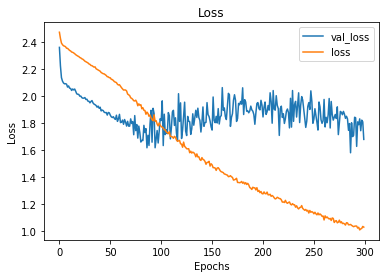

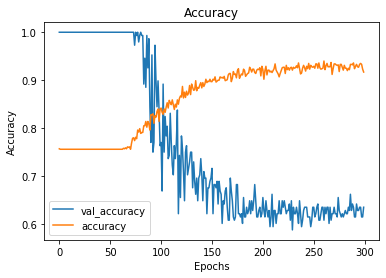

In [234]:
visualize_training_results2(summary5)

# Recall in Models

## Basic Model focused on recall

In [ ]:
model_one = models.Sequential()

model_one.add(layers.Dense(32, activation='relu', input_shape = (12288,)))
model_one.add(layers.Dense(1, activation='sigmoid'))

model_one.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=[Recall()])

sum1 = model_one.fit(train_p, train_y, epochs=1000,
                    batch_size=148,
                    validation_data=(val_p, val_y))

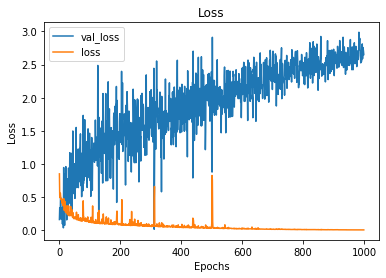

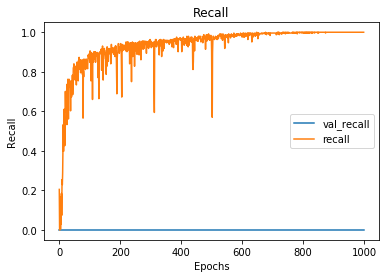

In [252]:
recall_visual(sum1)

In [246]:
model_col_r = models.Sequential()

model_col_r.add(layers.Dense(32, activation='relu', input_shape = (12288,)))
model_col_r.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization layer
model_col_r.add(layers.Dropout(0.2)) #drop out layer
model_col_r.add(layers.Dropout(0.2)) #drop out layer
model_col_r.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization layer
model_col_r.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #regularization layer
model_col_r.add(layers.Dropout(0.2)) #drop out layer
model_col_r.add(layers.Dense(64, activation='relu'))
model_col_r.add(layers.Dense(32, activation='relu'))

model_col_r.add(layers.Dense(1, activation='sigmoid'))

model_col_r.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=[Recall()])

summary9 = model_col_r.fit(train_p, train_y, epochs=500, batch_size=148,
                    validation_data=(val_p, val_y))

Train on 1000 samples, validate on 148 samples
Epoch 1/500
1000/1000 [==============================] - 1s 1ms/step - loss: 1.3253 - recall_4: 0.2787 - val_loss: 1.2877 - val_recall_4: 0.0000e+00
Epoch 2/500
1000/1000 [==============================] - 0s 198us/step - loss: 1.2965 - recall_4: 0.0000e+00 - val_loss: 1.2341 - val_recall_4: 0.0000e+00
Epoch 3/500
1000/1000 [==============================] - 0s 190us/step - loss: 1.2666 - recall_4: 0.0000e+00 - val_loss: 1.1644 - val_recall_4: 0.0000e+00
Epoch 4/500
1000/1000 [==============================] - 0s 199us/step - loss: 1.2391 - recall_4: 0.0000e+00 - val_loss: 1.0982 - val_recall_4: 0.0000e+00
Epoch 5/500
1000/1000 [==============================] - 0s 182us/step - loss: 1.2198 - recall_4: 0.0000e+00 - val_loss: 1.0445 - val_recall_4: 0.0000e+00
Epoch 6/500
1000/1000 [==============================] - 0s 195us/step - loss: 1.2083 - recall_4: 0.0000e+00 - val_loss: 1.0082 - val_recall_4: 0.0000e+00
Epoch 7/500
1000/1000 [======

In [255]:
summary9.history.keys()

dict_keys(['val_loss', 'val_recall_4', 'loss', 'recall_4'])

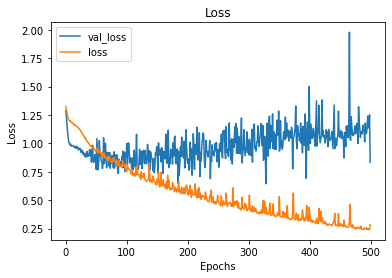

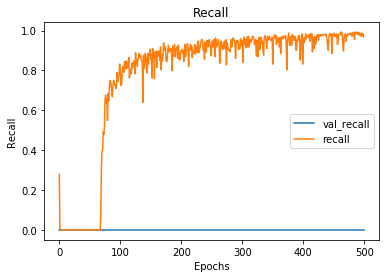

In [258]:
recall_visual2(summary9)